In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

house_df = pd.read_csv("/home/user/Pulpit/pani_ela_data_science/temat2/kc_house_data/kc_house_data.csv")

## 1. Linear Regression. A bit of formalism

Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, living squarefeet is a feature, house's price is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [2]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
price = house_df.price.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

## Exercise 1
a) Create functions *predict(b, X)* and *cost(y_pred, y_true)* implementing theory above.  All inputs should be numpy arrays (take care of dimension scalability!)  
b) For our data **$X,y$**, plot cost as the function of **$b$** (which is one dimensional vector). Plot the line with best slope among  evaluated with *cost* function.

In [3]:
# Use cases of np.dot()

# 1. In case of 1D arrays - a simple matrix multiplication
# We do not have to care about transforming one array to a column befor passing it as a parameter to dot funcion
#a = np.array([1,2])
#b = np.array([2,3])
#np.dot(a,b)
# Out:8

# 2. N-dim arrays: r also simple matrix multiplication
#a = np.array([[1,2,3],[2,3,4]])
#b = np.array([[1,2],[2,3],[3,4]])
#np.dot(a,b)
# Out: array([[14, 20],
#       [20, 29]])

# 3. Weights (for 3 features)
#w = np.array([2,2,2]) # weights for consectuive features (wf1,wf2,wf3)
#features = np.array([[1,1,1],[2,2,2],[3,3,3]])
#np.dot(features,w) # ATTENTION PLEASE! Order of multiplication has a meaning.
# Out: array([ 6, 12, 18])

# 4. Case: column form
#features = np.array([[1,2],[2,2],[3,2]]) # 3 observations with 2 features each
#w = np.array([[2],[2]])  # OR w = np.array([2,2])
#np.dot(features,w) # odwrotnej kolejnosci nie dziala
# Out: array([[ 6],
#             [ 8],
#            [10]]) # OR array([ 6,  8, 10])

#-------------------------------------------------------------
# 1. Substracting corresponding elements form two arrays
#a = np.array([1,2,3,4,5])
#b = np.array([2,2,2,2,2])
#sum(abs(a-b)) # Out: 7
# Out: array([1,  0,  1,  2,  3]) # abs(a-b)

# Case: one feature
#features = np.array([[1],[2],[3]]) # 3 observations with 1 features each
#w = np.array([[2]])
#np.dot(features,w)

In [4]:
#a)
#X = house_df.sqft_living.values.reshape(-1,1)[:100]
#y = house_df.price.values.reshape(-1,1)[:100]
# np.shape(X) = np.shape(y) = (100,1) # column form

def predict(b, X):
    """
    Parameters:
    ------------
    b - np.array 1 x m # dim checked
    X - np.array n x m
    
    Returns:
    ----------
    y - np.array : vactor of predictions for each row(point) in a dataset
    """
    return np.dot(X,b)

def cost(y_pred, y_true):
    # I guess that summetion is missed in above formula for cost
    n = len(y_true)
    return (sum((abs(y_pred - y_true)**2))/n)[0] # each one squared and then sum



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]]) # 3 features, 4 observations
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


In [5]:
#b) For our data  X,y , plot cost as the function of  b  (which is one dimensional vector). 
#   Plot the line with best slope among evaluated with cost function.

# We examine error as a function of weight assigned to given feature(in this case sqft_living)

# 1. Preparation for the first plot
# First we have to make up a vactor of proposed weights.
b = np.linspace(-1000,1000, num= 2001).reshape(-1,1)

#len(b) #2001

In [6]:
y_pred = []
for bi in b:
    y_pred.append( predict(bi, X) )

#len(y_pred) # 2001
len(y_pred)

2001

In [7]:
errors = [] # because we are calculating error for all possible b
for i in y_pred:
    mse = cost(i, y)
    errors.append(mse)
    
#len(b) # 2001

In [8]:
# 2. Preparation for the second plot
# First we have to find b for wih mse is the smallest.
# We can do this either analytically or numerically using Gradient Descent algorithm

In [204]:
cur_b = 1000 # The algorithm starts at x=3
rate = 0.000001 # Learning rate # for such a high values it was a crucial parameter
precision = 0.00001 #This tells us when to stop the algorithm
previous_step_size = 1 # ustalamy jakikolwiek(rozsądnie) na początek, a ogólnie jest po różnica między
                       # x uzyskanymi w kolejnych iteracjach
max_iters = 10000 # maximum number of iterations 
iters = 0 #iteration counter
df = lambda b: 2*sum(predict(b, X)-y)[0] # this allows for a continuous input,
# However as far as ploting function is concerned it must be always done with linspace for input

while previous_step_size > precision and iters < max_iters: # dopóki krok nie będzie naprawde malutki
    prev_b = cur_b #Store current x value in prev_x
    cur_b = cur_b - rate * df(prev_b) #Grad descent
    previous_step_size = abs(cur_b - prev_b) #Change in x
    iters = iters+1 #iteration count
    #print("Iteration",iters,"\nMSE value is",cur_b) #Print iterations
    
#print("The local minimum occurs at", cur_b)

In [10]:
# Gradient Descent constatnty points on the same value 248, as a b for a minimal MSE(mse = 53172279722.05)

In [11]:
b = 400
y_pred = predict(b, X)
mse = cost(y_pred, y)
mse

174141967277.25

In [12]:
53172279722.05<174141967277.25

True

In [13]:
# Indeed, it looks as if Gradient Descent were right.
# Why is that?

In [14]:
# Let's find out what is a value of b given by closed form solution.

In [15]:
from numpy.linalg import inv
b_closed = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
b_opt = b_closed[0][0]
b_opt

245.91180485842114

In [16]:
# This proves SGD almost right. 
# So, there's something wrong with a plot.
# This time I chcked all lengths.
# From this plot it looks as if MSE was calculated wrongly but it is not the case since SGD and closed form solution
# are consistent with result provided in the answer notebook.
# So there is sth wrong solely with plotting. But for now I am at the and of the rope.
# maybe play with xlim, ylim

In [17]:
x = np.array([[1],[1]])
x.reshape(-1)

array([1, 1])

<Figure size 1008x360 with 0 Axes>

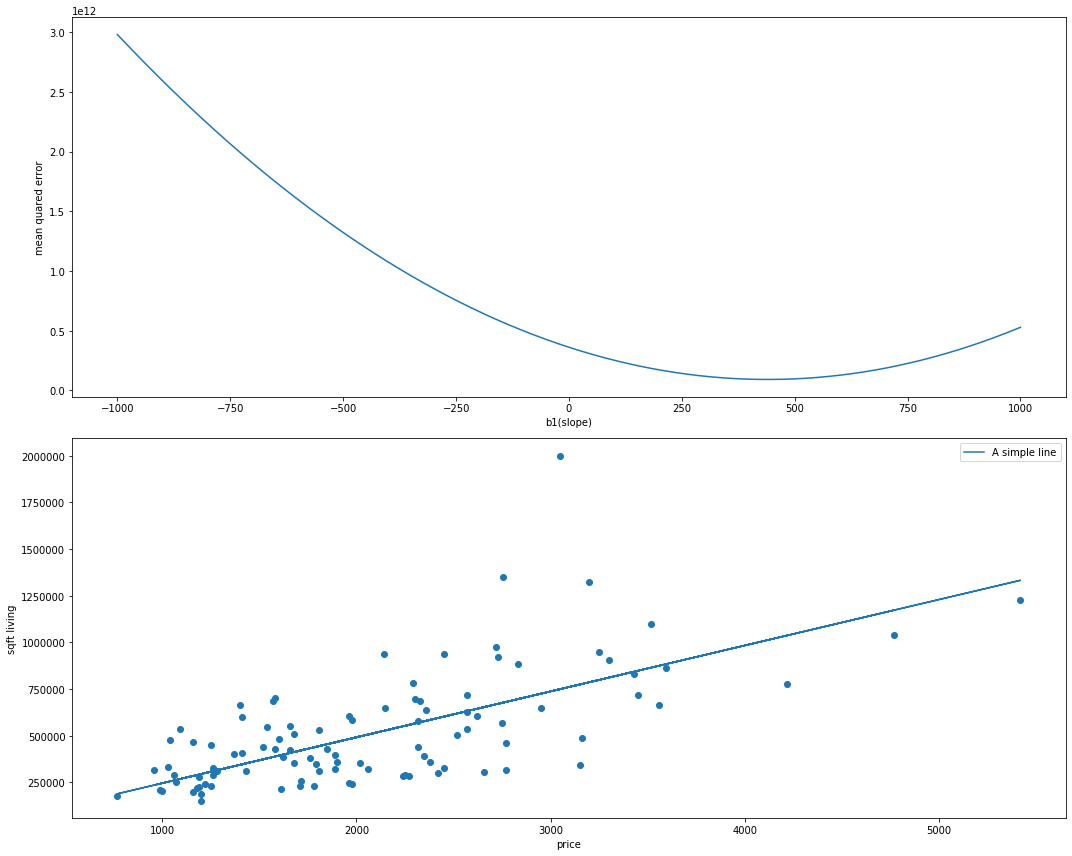

In [206]:
b_arr = np.linspace(-1000,1000, num= 2001).reshape(-1,1)
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

plt.figure(figsize=(14, 5))
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,12))

ax1 = plt.subplot(2,1,1)

cost_arr = [cost(predict(b,X),y) for b in b_arr]
plt.plot(b_arr,cost_arr)
#plt.plot(b, errors)
plt.xlabel('b1(slope)')
plt.ylabel('mean quared error')

#   Plot the line with best slope among evaluated with cost function.
# It means we have to choose slope that minimizes cost function
ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100]
plt.scatter(X, price)
# finding minimum b
#x2= linspace(0,5000, num = 10000) # i bet it should be done solely with xlim or sth
y2 = [predict(i,b_opt) for i in X] 

#import scipy.interpolate as sp
#new_X = np.linspace(np.min(X), np.max(X), 2001)
#pl_spline = sp.InterpolatedUnivariateSpline(X, y, k=1);
#y_new = pl_spline(new_X)
#smooth_spline = sp.InterpolatedUnivariateSpline(new_X, y_new, k=3)

plt.plot(X, y2)
ax2.legend(['A simple line'])
# interp1d works if we have function
# And this is it - a problem of plotting continuous function while having limited x-axis data
plt.xlabel('price')
plt.ylabel('sqft living') # add thi sth which is not a legend

plt.tight_layout()
plt.show()

# 2. Bias

The line above has limitation of crossing point (0,0). As on our data it doesn't seem harmful, let us check how our model would perform, if all $y$ were shifted by some constant. The interpretation is as follows: the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.

In [19]:
y2 = y + 1000000

In [207]:
y_pred2 = []
for bi in b:
    y_pred2.append( predict(bi, X) )
    
len(y_pred2)

ValueError: shapes (100,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [209]:
errors2 = [] # because we are calculating error for all possible b
for i in y_pred2:
    mse = cost(i, y2)
    errors2.append(mse)

In [210]:
# We have to calculate new b_opt
b_closed2 = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y2)
b_opt2 = b_closed2[0][0]
#b_closed2 = b_closed2[1][0]
b_closed2

array([[245.91180486]])

In [211]:
b = np.linspace(-1000,1000, num= 2001).reshape(-1,1)
len(errors2)

0

ValueError: x and y must have same first dimension, but have shapes (2001,) and (0,)

<Figure size 1008x360 with 0 Axes>

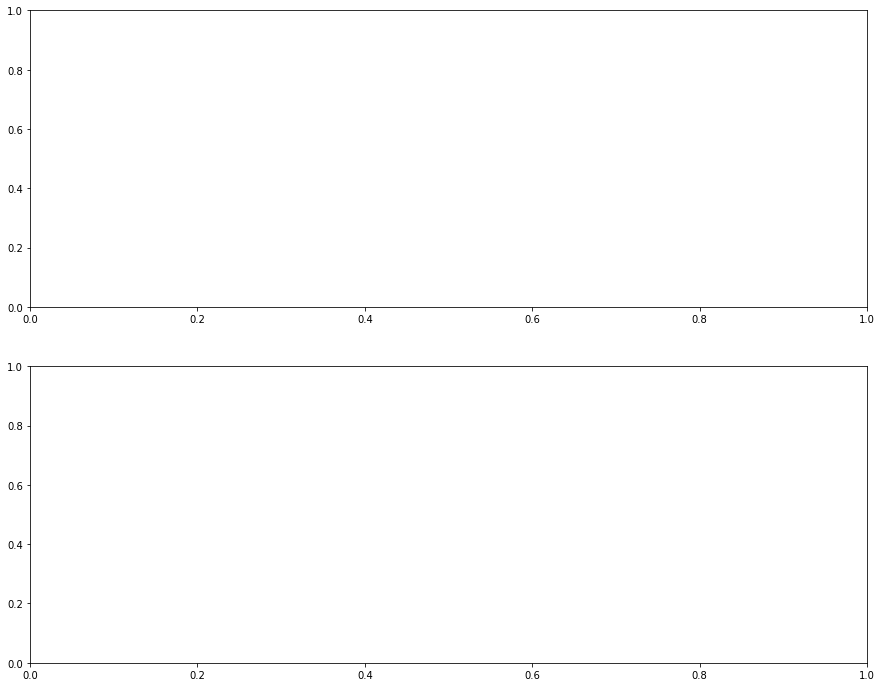

In [212]:
#if all  𝑦  were shifted by some constant. The interpretation is as follows:
#the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.
b = np.linspace(-1000,1000, num= 2001) # .reshape(-1,1) to ten reshape psu᷆ ksztalt wykresu
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

# It means that we should shift y (real y) - because it is the new real house price.

plt.figure(figsize=(14, 5))
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,12))


ax1 = plt.subplot(2,1,1)
plt.plot(b, errors2)
#"""
plt.xlabel('b1(slope)')
plt.ylabel('mean quared error')

#   Plot the line with best slope among evaluated with cost function.
# It means we have to choose slope that minimizes cost function
ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100]
#print(X.shape, (price+1000000).shape)
plt.scatter(X, price+1000000)
# finding minimum b
ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100] + 1000000
#plt.scatter(X, price+1000000, color = 'blue')
# finding minimum b
#x2= linspace(0,5000, num = 10000) # i bet it should be done solely with xlim or sth
y_new = [predict(i,b_opt2) for i in X] 

plt.plot(X, y_new)
# And this is it - a problem of plotting continuous function while having limited x-axis data
plt.ylabel('price + 1mln')
plt.xlabel('sqft living') # add thi sth which is not a legend

plt.tight_layout()
plt.show() 
#"""

In [ ]:
# nie wracaj juz do tego wyzej - lepiej nie bedzie

As we can see, for the best slope the error has grown almost by the factor of four. In addition we clearly see, that what limits us is indeed the constraint of all lines crossing point $(0,0)$.   

There are two basic solutions of this problem. One of them is centring of the data, that is substracting overall mean from all the values of given feature (or regressand).  

The other is adding bias term, which in this context (different than context discussed during the lectures!) may be understood as constant term in line equation. We simulate adding constant term to result of each prediction by appending artificial feature consisting of ones to **$X$** matrix and additional term to **$b$** vector.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [91]:
#a)
X = house_df.sqft_living.values.reshape(-1,1)[:100]
n,m = X.shape # for generality
X0 = np.ones((n,1))
Xnew = np.hstack((X,X0))
X = Xnew
Xnew[1]
X0

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
#b) # W tej czəsci zadania nalezalo po prostu dostosowac kod do poprzedniej czesci nb
y_shifted = y+1e6

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)] # ok
cost_arr = [cost(predict(b, X[:,0]), y_shifted) for b in b_arr] # ok
best_b1 = b_arr[np.argmin(cost_arr)] # good to know such a useful function exist


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix
# grid with dimenstions (num_possible_slopes x num_possible_biases) but each of them has different limits

In [ ]:
b_closed = inv(Xnew.transpose().dot(Xnew)).dot(Xnew.transpose()).dot(y)
best_b1, best_b2 = b_closed[0], b_closed[1]

In [ ]:
# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost( predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)
#np.array([[b_x[i,j]], [b_y[i,j]]]) - this is just matrix of weights np. [̧́[1],[1]] - weights means
# coefficiens for consecutive powers or features

# okej, we have just created predictions for all possible values of slope and bias.
# At the beginning we set bias and slope ourselves. time for optimization will come of course.

NameError: name 'b_x' is not defined

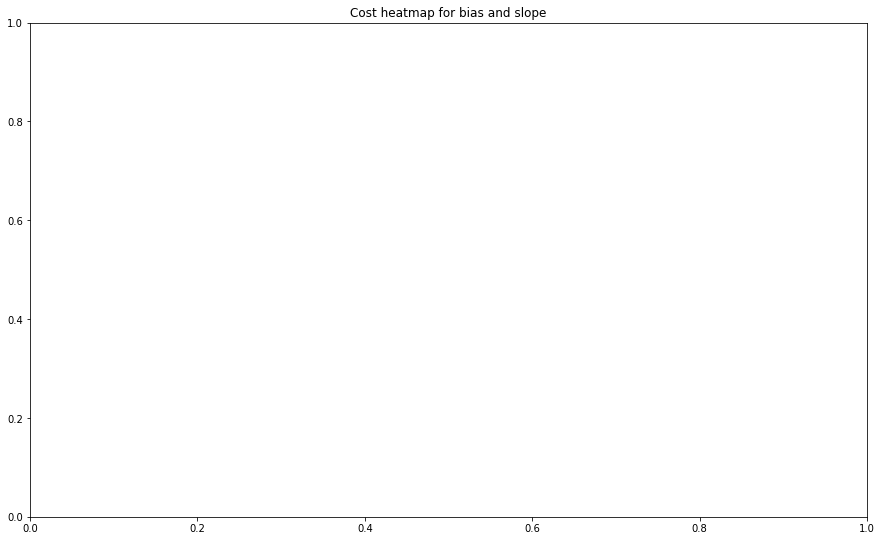

In [213]:
# I can see no incompatibilitiesin this code. All my functions work fine with it.
plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")

# Now we have to face incompatibilities

x_model = np.linspace(np.min(X), np.max(X), 1000) # 

y_model = b_opt2*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(b_opt, cost_arr[np.argmin(cost_arr)]))
#--------------------------------------------------------------------------------------------------
best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1 *x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(b_opt, b_opt2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

**Adding bias improved error by three orders of magnitude. Not bad!**

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [ ]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

In [ ]:
from statistics import stdev
#np.mean(X) ok
X_stdevflat = X.flatten()
X_stdev = stdev(X_flat)

In [ ]:
#a = np.array([[1,2,3],[2,3,4],[4,5,6]])
#a[:,0] #array([1, 2, 4])

In [37]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [38]:
#column(a,1) #[2, 3, 5]
X_stdev

NameError: name 'X_stdev' is not defined

In [39]:
meanX = np.mean(X)

In [40]:
#a)
def standardize(X): 
    '''
    Returns;
    ----------------
    1.Standarized features
    2.Original features means
    3.Standard deviations of features
    '''
    # 2. Original features means
    features_means = []
    for i in range(len(X[0])):
        features_means.append( np.mean(column(X,i)) )
    
    # 3. Standard deviations of features
    features_stdevs = []
    for i in range(len(X[0])):
        features_stdevs.append( np.std(column(X,i)) )
    
    # 1. Standdarized features
    # Ale musisz zadbac o kazda kolumne - standaryzowac kazda kolumne
    stand_X = np.zeros(np.shape(X))
    for j in range(len(X[:,0])): # dla kazdego wiersza
        
        for i in range(len(X[0])):# dla kazdej kolumny
            stand_X[j][i] = (X[j][i]-features_means[i])/features_stdevs[i]
    
    return np.array(stand_X), np.array(features_means), np.array(features_stdevs)

# wszystko do pltu 2
#b)
# Implement function destandardize(), which restores the original data given standardized feature matrix X
# and vectors containing original features' means and standard deviations.
def destandardize(X, means, sds):
    destand_X = np.zeros(np.shape(X))
    for j in range(len(X[:,0])): # dla kazdego wiersza
        
        for i in range(len(X[0])):# dla kazdej kolumny
            destand_X[j][i] = (X[j][i]*sds[i])+means[i]
    return destand_X


#short test:
W = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
standW, mean_f, stdev_f = standardize(W)
standardize(W)

#Hint: with np.mean and np.std first function is three lines long. The second is one-liner.

(array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995]))

In [41]:
destandardize(standW, mean_f, stdev_f) 

array([[1., 2., 3.],
       [2., 5., 4.],
       [3., 4., 5.],
       [4., 5., 7.]])

In [ ]:
standX, mean_fX, stdev_fX = standardize(X)

In [ ]:
destandX = destandardize(standX, mean_fX, stdev_fX) 

In [ ]:
#c)

plt.figure(figsize=(15,20)) 
        
plt.subplot(3,1,1)
# wszstko do plotu 1
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Original data')
plt.scatter(X,y)


#----------------------------------------------------------------------------------------------------------------
plt.subplot(3,1,2)
# wszystko do pltu 2
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Standarized data')
plt.scatter(standX, standardize(y)[0])


#----------------------------------------------------------------------------------------------------------------
plt.subplot(3,1,3)
# wszystko do pltu 3
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Restored data')
y_pred_stand = [predict(i,b_opt) for i in X]
plt.scatter(X,y)

#----------------------------------------------------------------------------------------------------------------
plt.show()


## 3. Gradient Descent Method

In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have

$$ \nabla f_{y}(b) = \nabla\dfrac{|Xb−y|^2}{n} = \dfrac{2X^\mathsf{T}(Xb−y)}{n}.  $$

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *sqft_living* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *sqft_living* and *sqft_lot*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [28]:
def gradient(b, X, y):
    '''
    Computes gradient for linear regression.
    '''
    # that is gradient of cost function which is calcuated for linear regression model
    
    return ( 2*np.dot(X.T, np.dot(X,b)-y) )/len(y) # dziala

def gradient_descent_step(b, X, y, lr):
    '''
    Returns:
    -----------------------
    new_b - found by gradient method
    '''
    return b - gradient(b,X,y)*lr # to juz sie zajmuje kazdym z wymiarow

In [29]:
#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


b) Take  𝑋  consisting of sqft_living together with bias column. Set  𝑦  as price. Standardize both  𝑋  (without bias) and  𝑦 . Plot a heatmap showing dependence of cost function's value on vector  𝑏 . Mark first 5 steps of gradient descent with learning rate =  0.2 , starting from  𝑏=[[3],[2]] . Experiment with other learning rates.

In [56]:
# I hope I understood correctly that we have to make feature marix out of sqft and bias together 
#Xnew[1]
#y
# standarize X(without bias - bo po co skoro to 1-ki) and y
#standardize(Xnew) # Our function can be used easily to standardize given matirx if we first standardize X col
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

In [68]:
X_sqft_stand = standardize(X)[0]
n,m = X.shape # for generality
X0 = np.ones((n,1))
X_stand = np.hstack((X_sqft_stand,X0)) # dobrz
y_stand = standardize(y)[0] # dobrz
# no ale jak b moze byc jednowymiarowe skoro sa dwie cechy

 Plot a heatmap showing dependence of cost function's value on vector 𝑏 . Mark first 5 steps of gradient descent with learning rate = 0.2 , starting from 𝑏=[[3],[2]] . Experiment with other learning rates.

In [100]:
# Ale wpierw ogarnij b jakiego uzywasz
# No wlasnie
# Sklej b z tego co bedzie nizej, potem to wszystko ladnie posprzataj
b1 = np.linspace(-4, 4, num = 100).reshape(-1,1)
b2 = np.linspace(-4, 4, num = 100).reshape(-1,1)
b = np.hstack((b1,b2))

In [159]:
#bs_cost = np.array(bs_cost).reshape(-1,1)
#bs_cost
b1_new

array([0.83329164])

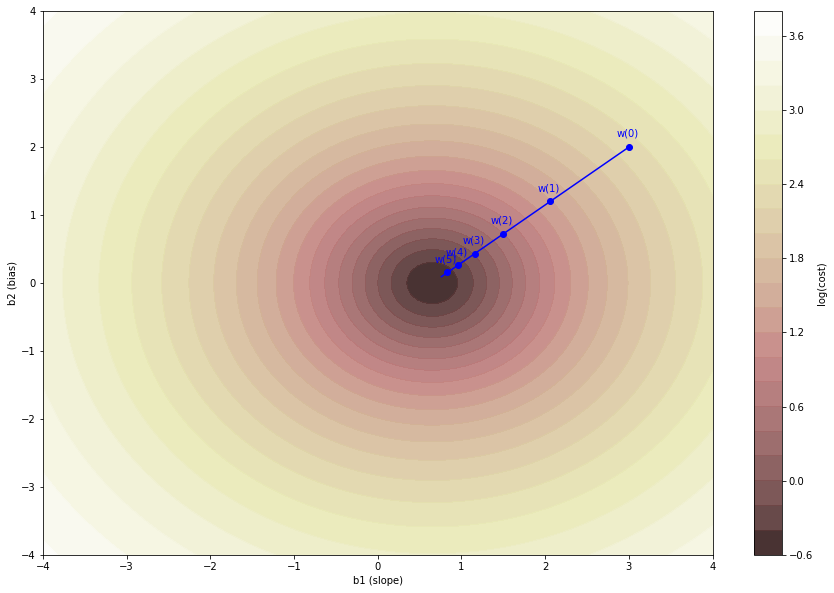

In [184]:
#b)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X_stand) , y_stand)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[2]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10 , color = 'blue')
    new_b = gradient_descent_step(b_start, X_stand, y_stand, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()


c) Take  𝑋  consisting of sqft_living and sqft_lot. Set  𝑦  as price. Standardize both  𝑋  and  𝑦 . Plot a heatmap showing dependence of cost function's value on vector  𝑏 . Mark first 5 steps of gradient descent with learning rate =  0.2 , starting from  𝑏=[[3],[1]] . Experiment with other learning rates

In [173]:
# Wole zaladowac od nowa dla bezpieczenstwa
#X = house_df.sqft_living.values.reshape(-1,1)[:100]
X_lot = house_df.sqft_lot.values.reshape(-1,1)[:100]
#y = house_df.price.values.reshape(-1,1)[:100]
# X_stand juz mamy

In [176]:
X_lot_stand = standardize(X_lot)[0]
X_stand2 = np.hstack((X_sqft_stand,X_lot_stand)) # dobrz
#y_stand = standardize(y)[0] # to te… juz jest
# no ale jak b moze byc jednowymiarowe skoro sa dwie cechy
#X_stand2

In [ ]:
# kod w zasadzie tan sam co poprzednio tylko czym innym go pokarmic

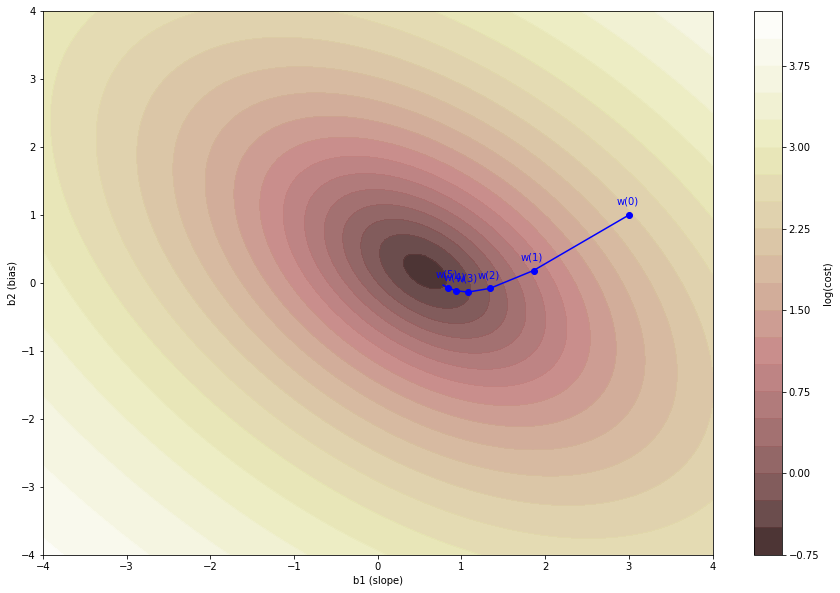

In [178]:
#c)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X_stand2) , y_stand)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[1]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10, color = 'blue')
    new_b = gradient_descent_step(b_start, X_stand2, y_stand, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()



In [200]:
#d) Redion b and c without standarisation
print(X_stand[1])
print(X[1])


[0.56209957 1.        ]
[2.57e+03 1.00e+00]


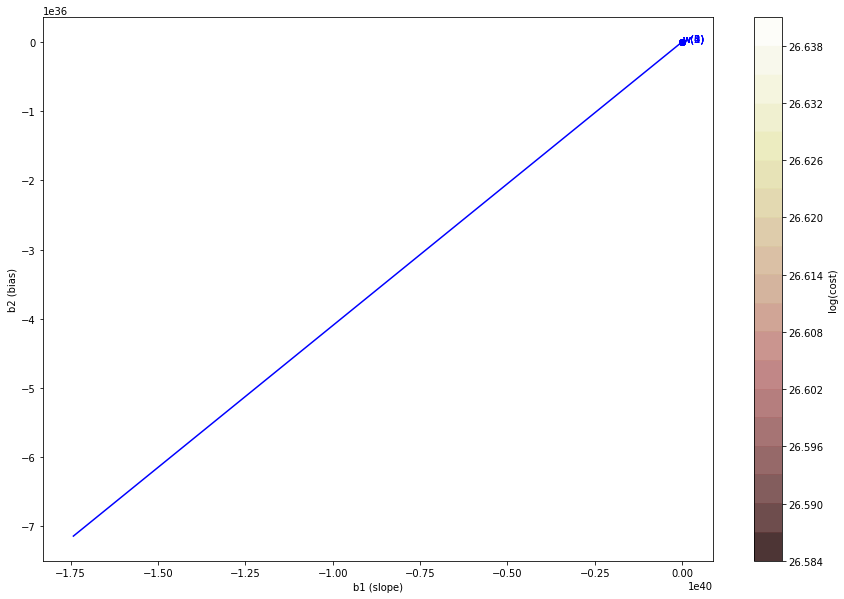

In [201]:
#b)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X),y)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[2]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10 , color = 'blue')
    new_b = gradient_descent_step(b_start, X , y, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()

In [202]:
# bez standaryzacji wyglada to okropnie

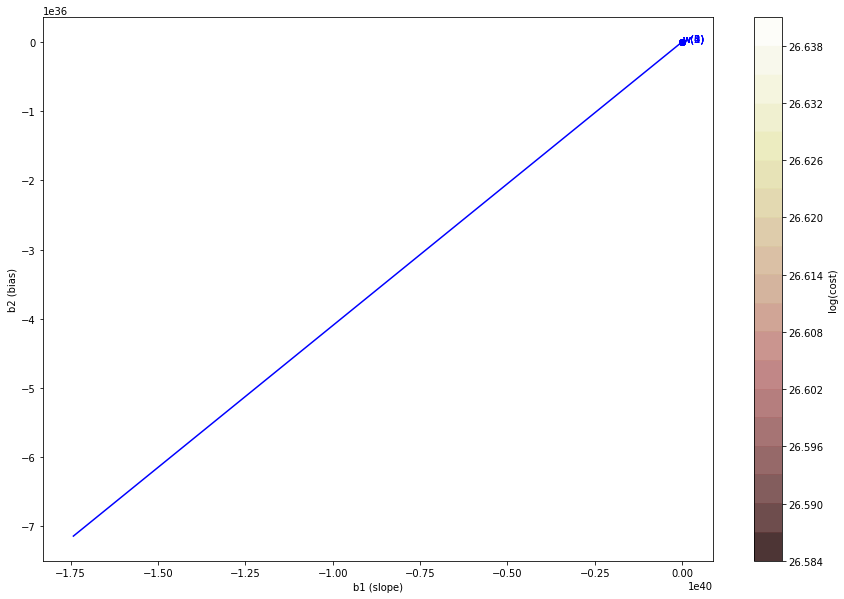

In [203]:
#c)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X) , y)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[1]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10, color = 'blue')
    new_b = gradient_descent_step(b_start, X, y, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()